[Penn State Stats Course](https://online.stat.psu.edu/stat501/lesson/5)

(https://www.quora.com/How-do-you-manually-calculate-the-standard-error-of-the-coefficients-in-multiple-regression)

$$
\hat{\sigma^2}(X^TX)^{-1}
$$

By default, the test statistic is calculated assuming the user wants to test that the slope is 0. Dividing the estimated coefficient of -5.9776 by the estimated standard error of 0.5984, Minitab reports that the test statistic T is -9.99.

By default, the P-value is calculated assuming the alternative hypothesis is a "two-tailed, not-equal-to" hypothesis. Upon calculating the probability that a t-random variable with n-2 = 47 degrees of freedom would be larger than 9.99, and multiplying the probability by 2, Minitab reports that P is 0.000 (to three decimal places). That is, the P-value is less than 0.001. (Note we multiply the probability by 2 since this is a two-tailed test.)

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mls import mls

In [5]:
df = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/stat_females.txt',
                 sep='\t')

In [6]:
df.head()

,Height,momheight,dadheight
0,66.0,66.0,71.0
1,64.0,62.0,68.0
2,64.0,65.0,70.0
3,69.0,66.0,76.0
4,66.0,63.0,70.0


In [9]:
zz = mls(df, y='Height', x=['momheight','dadheight'])
print(zz)

                Coef   SE_Coef   T-Value       p-Value
Variable                                              
Constant   18.547252  3.692784  5.022566  1.084098e-06
momheight   0.303506  0.054464  5.572630  7.608460e-08
dadheight   0.387856  0.047207  8.216005  2.109424e-14

R-squared: 0.4335, R-bar-squared: 0.4281
F-statistic (2, 211): 80.7340, p-value: 0.0000
Number of observations: 214


In [10]:
body_fat_df = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bodyfat.txt', sep='\t')
bf = mls(body_fat_df, y='Bodyfat', x=['Triceps', 'Thigh', 'Midarm'])
print(bf)

                Coef    SE_Coef   T-Value   p-Value
Variable                                           
Constant  117.084695  99.782403  1.173400  0.257808
Triceps     4.334092   3.015511  1.437266  0.169911
Thigh      -2.856848   2.582015 -1.106441  0.284894
Midarm     -2.186060   1.595499 -1.370142  0.189563

R-squared: 0.8014, R-bar-squared: 0.7641
F-statistic (3, 16): 21.5157, p-value: 0.0000
Number of observations: 20


In [17]:
#paste this cell's output into overleaf
print(bf.to_latex())

\begin{tabular}{lrrrr}
\multicolumn{5}{c}{Ordinary Least Squares}\\
\hline \hline
Variable & Coef & SE-Coef & T-stat & P-stat\\
\hline
Constant & 117.08 & 99.78 & 1.17 & 0.2578 \\
Triceps & 4.33 & 3.02 & 1.44 & 0.1699 \\
Thigh & -2.86 & 2.58 & -1.11 & 0.2849 \\
Midarm & -2.19 & 1.60 & -1.37 & 0.1896 \\
\hline
\multicolumn{5}{l}{R-squared: 0.8014, R-bar-squared: 0.7641} \\
\multicolumn{5}{l}{F-statistic (3, 16): 21.5157, p-value: 0.0000} \\
\multicolumn{5}{l}{Number of observations: 20}
\end{tabular}


In [14]:
phys = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/Physical.txt', sep='\t')
print('--------- Data Frame ----------')
print(phys.head())

phys_mls = mls(phys, y='Height', x=['LeftArm','LeftFoot',  'HeadCirc','nose'])
print('\n--------- Regression Results -----------')
print(phys_mls)

--------- Data Frame ----------
   Obs   Sex  Height  LeftArm  RtArm  LeftFoot  RtFoot  LeftHand  RtHand  \
0    1  Male    69.0     25.5   25.5      27.0    26.5      9.50    9.00   
1    2  Male    79.0     28.0   25.0      29.0    27.5      9.00    9.00   
2    3  Male    75.0     27.0   27.5      31.0    32.0      3.75    3.75   
3    4  Male    69.0     25.0   25.5      25.5    25.5     10.00    8.00   
4    5  Male    65.0     25.0   25.0      23.5    23.0      9.50    9.40   

   HeadCirc  nose  
0      58.5   5.5  
1      54.0   5.0  
2      62.5   5.0  
3      58.5   5.5  
4      57.0   4.4  

--------- Regression Results -----------
               Coef   SE_Coef   T-Value       p-Value
Variable                                             
Constant  18.502649  7.830309  2.362952  2.206045e-02
LeftArm    0.802049  0.170743  4.697394  2.094548e-05
LeftFoot   0.997300  0.162299  6.144849  1.302874e-07
HeadCirc   0.080522  0.149519  0.538536  5.925968e-01
nose      -0.147400  0.49

In [15]:


N = 2000

xx = np.random.rand(N,3)
yy = 4 + 3.24*xx[:,0] - 6.43*xx[:,1] + 15.21*xx[:,2]+np.random.normal(size=N,scale=1.0)

df=pd.DataFrame({'y':yy, 'X1':xx[:,0], 'X2':xx[:,1]})

zz = mls(df, y='y', x=['X1','X2'], nocon=True)
print(zz)

               Coef   SE_Coef    T-Value  p-Value
Variable                                         
X1        13.013049  0.374078  34.786979      0.0
X2         3.972269  0.367340  10.813601      0.0

R-squared: 0.7704, R-bar-squared: -0.6515
F-statistic (1, 1998): -787.5595, p-value: 1.0000
Number of observations: 2000


In [16]:
deposits = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/newaccounts.txt',
                       sep='\t')
print(deposits.columns)

deposits_mls = mls(deposits, y='New', x=['Size'])
print(deposits_mls)

Index(['Size', 'New', 'New2'], dtype='object')
               Coef    SE_Coef   T-Value   p-Value
Variable                                          
Constant  50.722513  39.397914  1.287442  0.230060
Size       0.486702   0.274711  1.771689  0.110213

R-squared: 0.2586, R-bar-squared: 0.1762
F-statistic (1, 9): 3.1389, p-value: 0.1102
Number of observations: 11


In [18]:
height_gpa = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/heightgpa.txt',
                         sep='\t')
height_gpa.columns
height_gpa_mls = mls(height_gpa,y='gpa', x=['height'])
print(height_gpa_mls)

              Coef   SE_Coef   T-Value   p-Value
Variable                                        
Constant  3.410214  1.434616  2.377091  0.023402
height   -0.006563  0.021428 -0.306282  0.761314

R-squared: 0.0028, R-bar-squared: -0.0274
F-statistic (1, 33): 0.0938, p-value: 0.7613
Number of observations: 35


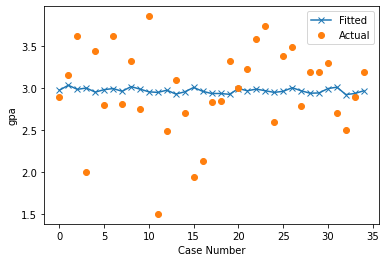

In [19]:
height_gpa_mls.plotfit()

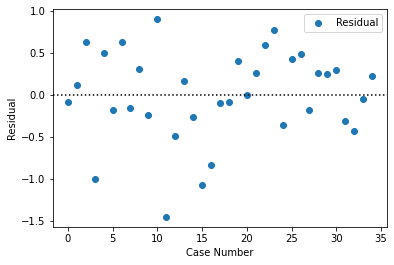

In [20]:
height_gpa_mls.plotresid()